Music synthesiser using Karplus Strong algorithm

This notebook contains instructions for implementation of Karplus Strong algorithm in python

In [14]:
#Important parameters
#Varying these parameters will produce different kinds of sound
#Change these parameters and observe how final sound changes

#Number of samples to be fed in output in every iteration - L

#Total number of samples in the final audio - N

#Frequency of the final audio - fs

#Volume control of audio - volume 

#Parameters for the initial condition of output line
#Initial condition of output line is white gaussian noise in this program
#You can try different kinds of noise
#mean = 0
#sd = 1   #Standard deviation

In [15]:
#Importing essential libraries
import numpy as np
from scipy.io import wavfile
from IPython.display import Audio

In [16]:
#Function to generate white noise for initial conditions of output line
def white_noise_generator(mean, sd, L):
  """
  Arguments
  mean - mean of the white noise distribution
  sd - standard deviation of white noise distribution
  
  Returns
  numpy array of size L with mean and standard deviation as specified by arguments
  """
  white_noise = np.random.normal(mean, sd, size = L)
  return white_noise

In [17]:
#A low pass filter
def filter_lp(signal):
  """
  Arguments
  signal - numpy array of size L

  Returns
  numpy array of size L

  Example
  If signal is [0, 1, 2, 3]
  then function should return ([0, 1, 2, 3] + [3, 0, 1, 2])/2 = [1.5, 0.5, 1.5, 2.5]
  """
  dis=np.roll(signal,1)
  output= (signal+dis)/2
  return output

In [24]:
def generateNote(mean, sd, N, L, volume):
#Main part of code

#Initialize output numpy array with white noise
  white_noise = white_noise_generator(mean, sd, L)

#Till output array does not have N samples append output of filter to output array
  note = white_noise
  filter_op = white_noise
  while len(note) != N:
    filter_op = filter_lp(filter_op)
    note = np.append(note, filter_op)
#Set the volume of sound
#Write code
  note = volume*note

  return note

In [25]:
#Write output array to wavfile
#wavfile.write('MyMusic.wav', fs, sound)
#Audio(sound, rate = fs)
note1 = generateNote(0, 1, 9900, 15, 1000)
note2 = generateNote(0, 1, 9900, 25, 1000)
note3 = generateNote(0, 1, 9900, 50, 1000)
note4 = generateNote(0, 1, 9900, 100, 1000)

sound = np.concatenate((note1, note2, note3, note4))
Audio(np.array(sound), rate = 9900)

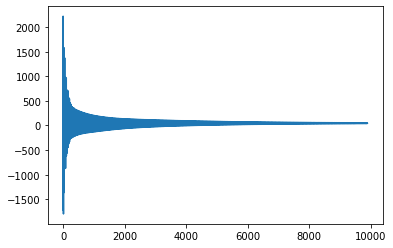

In [26]:
import matplotlib.pyplot as plt
plt.plot(np.array(note2))